In [1]:
import hodopy.hodopy as hp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xylist = np.array([68,343,96,100,214,317,334,200,365,333])
ctlptlist = np.reshape(xylist, (-1,2))

ndiv = 200
t = np.linspace(-1,1,ndiv+1)

ptlist = hp.getHCCPt(ctlptlist, t, 'all')    

print(ptlist.shape)

(201, 3, 2)


In [3]:
polygonlen = hp.computePolygonLength(ctlptlist)
curvelen = hp.getHCCLength(ctlptlist, ndiv=200, curve="all")
labs = ['Gauss-Legendre','Gauss-Lobatto', 'Bézier', 'Control Polygon']
lengths = np.hstack((curvelen, [polygonlen]) )
lab2 = [labs[i] + f"({lengths[i]:0.3f})" for i in range(4)]
print(lab2)

['Gauss-Legendre(697.953)', 'Gauss-Lobatto(651.357)', 'Bézier(418.043)', 'Control Polygon(795.779)']


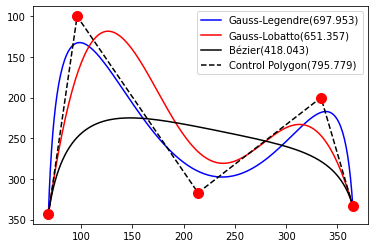

In [4]:
px, py = ptlist[:,:,0], ptlist[:,:,1]
res = plt.plot(px, py)
[res[i].set_color(c) for i, c in enumerate(['b','r','k'])]

cx, cy = ctlptlist[:,0], ctlptlist[:,1]
plt.plot(cx, cy, '--k')
plt.plot(cx, cy, 'ro', markersize=10)
plt.gca().invert_yaxis()

plt.legend(lab2)
plt.show()